<a href="https://colab.research.google.com/github/BerkanDemiral/PythonBasicExamples/blob/main/NLP_QnAModels.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install nltk

import time
import matplotlib.pyplot as plt
import pandas as pd
import nltk
from collections import Counter
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize, sent_tokenize, PunktSentenceTokenizer
from nltk.util import ngrams
from nltk import pos_tag
import warnings
import os
from google.colab import files
from transformers import pipeline
import random


nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('averaged_perceptron_tagger')

warnings.filterwarnings("ignore")

uploaded = files.upload()
file_name = list(uploaded.keys())[0]

with open(file_name, 'r', encoding='utf-8') as file:
    context = file.read()

print("Context dosyası başarıyla yüklendi ve içerik alındı!")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


Saving lastContext.txt to lastContext.txt
Context dosyası başarıyla yüklendi ve içerik alındı!


In [2]:
print(context)

Yapay zeka (AI - Artificial Intelligence) günümüzde hızla gelişmekte olan bir field (alan) haline geldi. Research (araştırma) çalışmaları kapsamında machine learning (makine öğrenimi), deep learning (derin öğrenme) gibi konular öne çıkıyor. Machine learning, verilerden pattern (desen) çıkarma ve bu desenleri kullanarak prediction (tahmin) yapma üzerine yoğunlaşan bir yaklaşımdır. Deep learning ise bu sürecin daha derin katmanlar kullanılarak daha kompleks (karmaşık) sorunları çözmesini sağlayan bir alt dalıdır. Neural networks (sinir ağları), deep learning için temel taşı oluşturur ve verinin çok katmanlı bir yapıda işlenerek daha anlamlı çıktılar elde edilmesini sağlar.

Özellikle Natural Language Processing (NLP) alanında yapılan çalışmalar hem Türkçe hem de English (İngilizce) dillerinde büyük önem taşıyor. Sentiment analysis (duygu analizi) gibi tasks (görevler) artık birçok farklı dilde uygulanabilir hale geldi. Ancak, Türkçe gibi bazı dillerde morphological complexity (morfolojik

In [3]:
words = word_tokenize(context.lower()) # Tüm kelimeleri küçük harfe çevirir
sentences = sent_tokenize(context) # Ardından noktalama işaretleri (., !, ?) ile cümle sonlarını belirleyerek metni cümlelerine böler.
sentences

['Yapay zeka (AI - Artificial Intelligence) günümüzde hızla gelişmekte olan bir field (alan) haline geldi.',
 'Research (araştırma) çalışmaları kapsamında machine learning (makine öğrenimi), deep learning (derin öğrenme) gibi konular öne çıkıyor.',
 'Machine learning, verilerden pattern (desen) çıkarma ve bu desenleri kullanarak prediction (tahmin) yapma üzerine yoğunlaşan bir yaklaşımdır.',
 'Deep learning ise bu sürecin daha derin katmanlar kullanılarak daha kompleks (karmaşık) sorunları çözmesini sağlayan bir alt dalıdır.',
 'Neural networks (sinir ağları), deep learning için temel taşı oluşturur ve verinin çok katmanlı bir yapıda işlenerek daha anlamlı çıktılar elde edilmesini sağlar.',
 'Özellikle Natural Language Processing (NLP) alanında yapılan çalışmalar hem Türkçe hem de English (İngilizce) dillerinde büyük önem taşıyor.',
 'Sentiment analysis (duygu analizi) gibi tasks (görevler) artık birçok farklı dilde uygulanabilir hale geldi.',
 'Ancak, Türkçe gibi bazı dillerde morphol

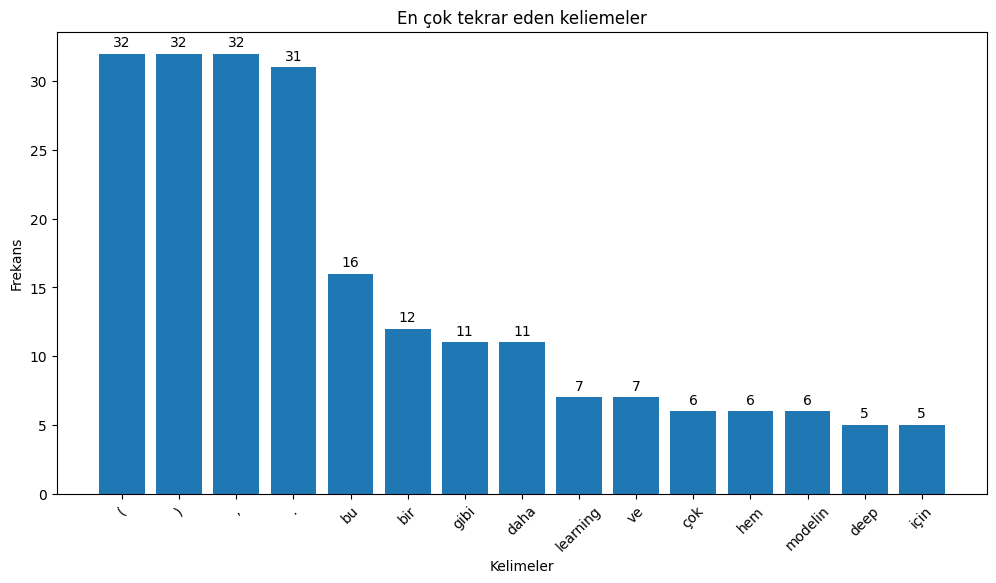

In [4]:
def plot_word_frequency(words):
    word_counts = Counter(words) # Her kelimenin kaç kez tekrar ettiği sayılıyor
    common_words = word_counts.most_common(15)
    labels, counts = zip(*common_words) # Label ve tekrar sayısı bazlı olarak zipliyoruz

    plt.figure(figsize=(12, 6))
    bars = plt.bar(labels, counts) # plt.bar'ın dönüş değerini 'bars' değişkenine atıyoruz
    plt.title("En çok tekrar eden keliemeler")
    plt.xlabel("Kelimeler")
    plt.ylabel("Frekans")
    plt.xticks(rotation=45)

    plt.bar_label(bars, labels=[str(count) for count in counts], padding=3)

    plt.show()

plot_word_frequency(words)

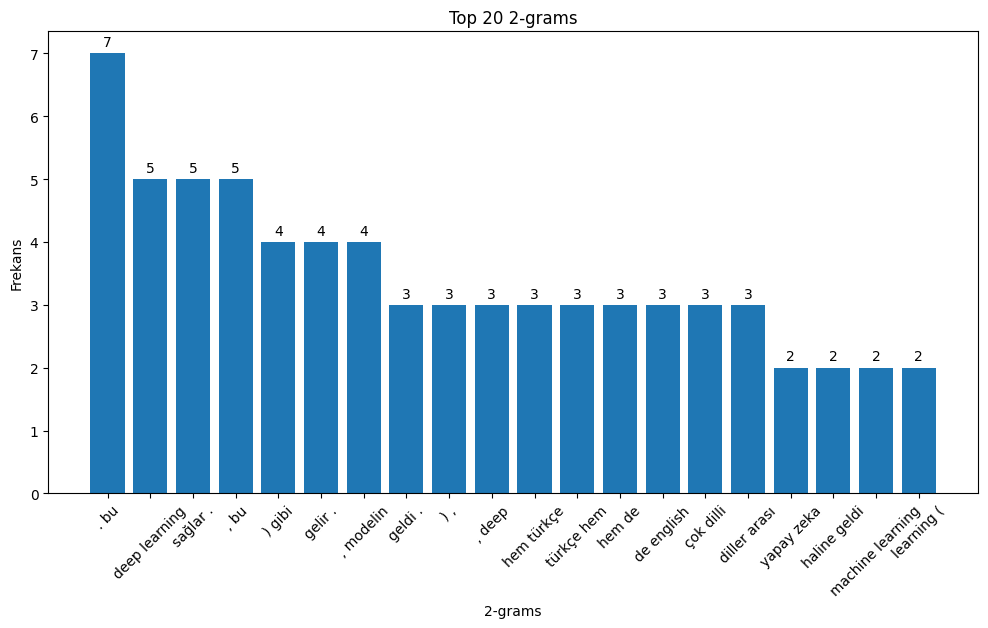

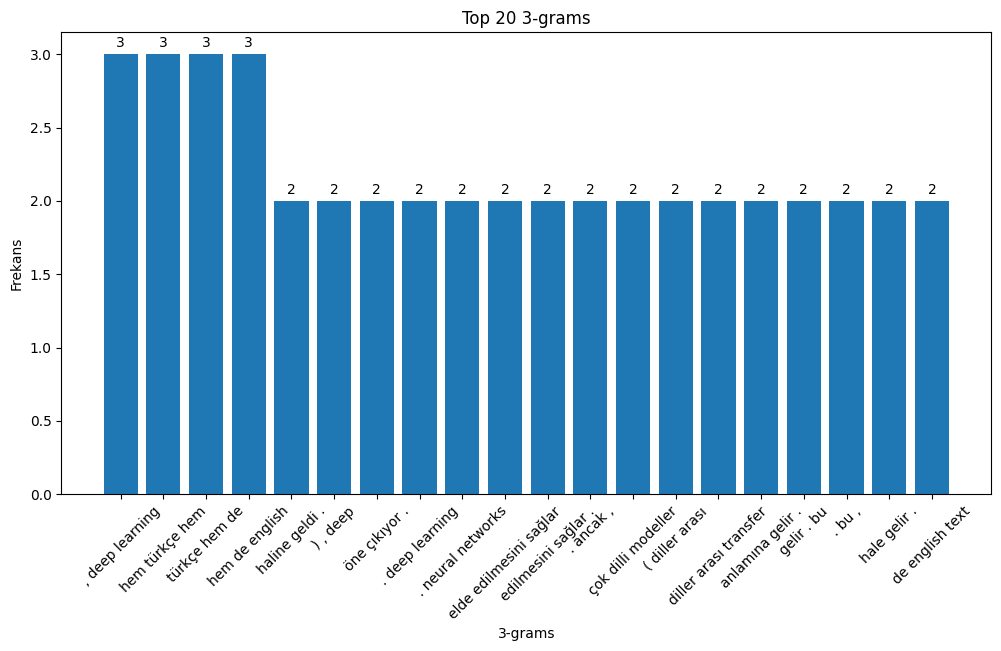

In [5]:
def plot_ngram_frequency(words, n=2, top_n=20):
    n_grams = list(ngrams(words, n))
    ngram_counts = Counter(n_grams)
    common_ngrams = ngram_counts.most_common(top_n)
    labels = [' '.join(gram) for gram, count in common_ngrams]
    counts = [count for gram, count in common_ngrams]

    plt.figure(figsize=(12, 6))
    bars = plt.bar(labels, counts)
    plt.title(f"Top {top_n} {n}-grams")
    plt.xlabel(f"{n}-grams")
    plt.ylabel("Frekans")
    plt.xticks(rotation=45)

    plt.bar_label(bars, labels=[str(count) for count in counts], padding=3)

    plt.show()


plot_ngram_frequency(words, n=2)  # Bi-gram
plot_ngram_frequency(words, n=3)  # Tri-gram

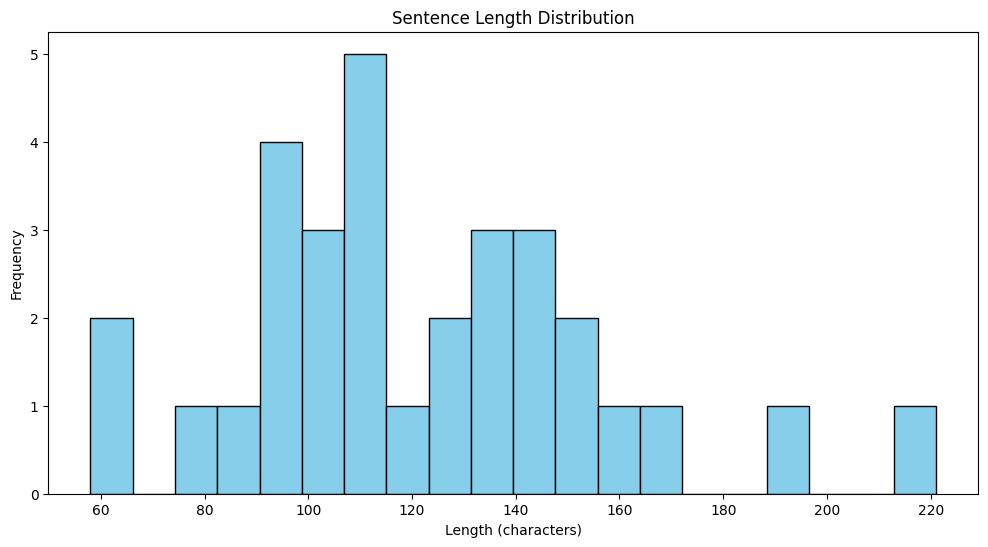

In [6]:
# 3. Karakter Uzunluğu Dağılımı
def plot_character_length_distribution(sentences):
    lengths = [len(sentence) for sentence in sentences]

    plt.figure(figsize=(12, 6))
    plt.hist(lengths, bins=20, color='skyblue', edgecolor='black')
    plt.title("Sentence Length Distribution")
    plt.xlabel("Length (characters)")
    plt.ylabel("Frequency")
    plt.show()

plot_character_length_distribution(sentences)

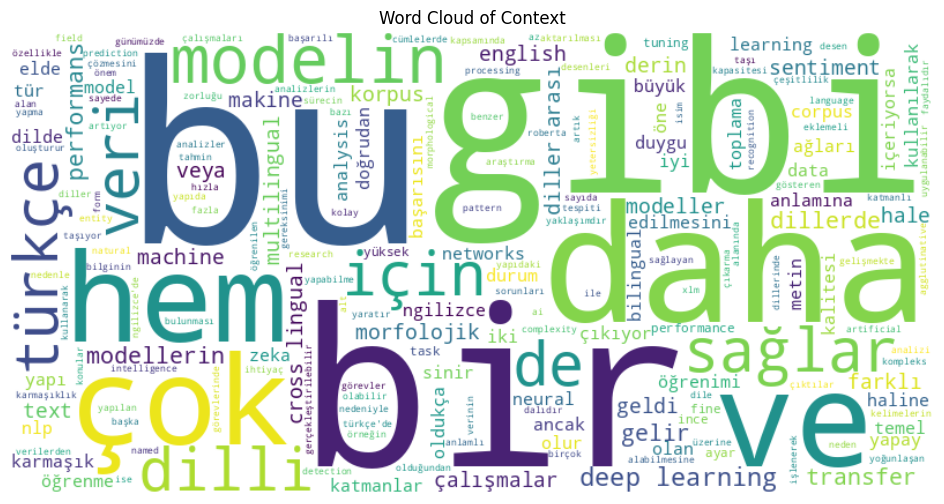

In [7]:
!pip install WordCloud

words = word_tokenize(context.lower())

text_for_wordcloud = ' '.join(words) # Tüm kelimelerin birleştirilerek frekans ağırlıklarına bakılacak. Bunun için birşeştirme işlemini yapıyoruz.

wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(text_for_wordcloud)

# Word Cloud grafiği gösterme
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud of Context")
plt.show()

## Soru-Cevap Modelleme

### Algoritmaların Tanımlanması ve Giriş

In [8]:
models = {
    "DistilBERT": pipeline("question-answering", model="distilbert-base-cased-distilled-squad"),
    "BERT-Large": pipeline("question-answering", model="bert-large-uncased-whole-word-masking-finetuned-squad"),
    "XLM-RoBERTa": pipeline("question-answering", model="deepset/xlm-roberta-large-squad2"),
}


config.json:   0%|          | 0.00/473 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/261M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/436k [00:00<?, ?B/s]

Device set to use cpu


config.json:   0%|          | 0.00/443 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.34G [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-large-uncased-whole-word-masking-finetuned-squad were not used when initializing BertForQuestionAnswering: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForQuestionAnswering from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForQuestionAnswering from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

Device set to use cpu


config.json:   0%|          | 0.00/606 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/2.24G [00:00<?, ?B/s]

Some weights of the model checkpoint at deepset/xlm-roberta-large-squad2 were not used when initializing XLMRobertaForQuestionAnswering: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing XLMRobertaForQuestionAnswering from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing XLMRobertaForQuestionAnswering from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tokenizer_config.json:   0%|          | 0.00/179 [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/150 [00:00<?, ?B/s]

Device set to use cpu


In [9]:
simple_questions = [
    "What is artificial intelligence?",
    "Yapay zeka nedir?",
    "What is machine learning?",
    "Makine öğrenimi nedir?",
    "What is deep learning?",
    "Derin öğrenme nedir?",
    "What is sentiment analysis?",
    "Duygu analizi nedir?",
    "What is a multilingual model?",
    "Çok dilli bir model nedir?"
]

medium_questions = [
    "How do neural networks help in deep learning?",
    "Sinir ağları derin öğrenmede nasıl yardımcı olur?",
    "What are the challenges of sentiment analysis in Turkish?",
    "Türkçe duygu analizinin zorlukları nelerdir?",
    "How does a multilingual model improve cross-lingual understanding?",
    "Çok dilli bir model diller arası anlamayı nasıl geliştirir?",
    "What is the importance of data collection in AI?",
    "Yapay zeka için veri toplama neden önemlidir?",
    "What is fine-tuning in machine learning?",
    "Makine öğreniminde ince ayar nedir?"
]

complex_questions = [
    "Explain the concept of cross-lingual transfer.",
    "Diller arası transfer kavramını açıklayın.",
    "How do multilingual models handle morphological complexity?",
    "Çok dilli modeller morfolojik karmaşıklığı nasıl ele alır?",
    "Describe the challenges in developing multilingual NLP models.",
    "Çok dilli NLP modelleri geliştirme zorluklarını açıklayın.",
    "How does corpus quality affect model performance?",
    "Korpus kalitesi model performansını nasıl etkiler?",
    "Açıkla how fine-tuning can improve bilingual performansını.",
    "İnce settingslerin iki dilli performansı nasıl artırabileceğini explain et."
]


In [10]:
# Tüm soruları birleştiriyoruz
all_questions = simple_questions + medium_questions + complex_questions

# Sonuçları saklamak için boş liste
results = []

**Problem:**
> NLP modellerinin verdiği cevapların bağlama uygun olup olmadığını ölçmek her zaman kolay değildir. İnsan değerlendirmesi ile bu tür bir uygunluğu ölçmek mümkün olsa da, bu subjektif bir süreçtir ve her zaman tutarlı sonuçlar vermez. Bu nedenle burada context - soru ve cevap ilişkisini kütüphaneler ile kurdum.

**Amaç:**
> Bu projede, bir bağlam (context) verildiğinde NLP modellerinin sorulara verdiği cevapların bağlam içeriğine uygunluğunu ve doğruluğunu ölçmek istiyoruz. Bunun için bağlamda geçen önemli terimlerle modelin cevabı arasında anlamsal benzerlik kurarak otomatik puanlama yapıyoruz.

**Yöntem:**


1. Semantic Similarity (Anlamsal Benzerlik) Hesaplama
  * Anlamsal benzerlik, bir cevabın bağlamla ne kadar anlam olarak örtüştüğünü ölçer
  * Bu benzerliği ölçmek için Sentence-BERT adında bir model kullandım.
BERT tabanlı bu model, metinleri sayısal bir vektöre dönüştürür. Vektörler arasındaki benzerliği ölçerek iki metnin ne kadar yakın anlamda olduğunu söyler.
  * Context (Bağlam) ve Answer (Cevap) ayrı ayrı Sentence-BERT modeliyle sayısal vektörlere dönüştürülür.
  * Bu vektörler arasındaki benzerlik, cosine similarity adı verilen bir yöntemle ölçülür.

2. Cosine similarity, iki vektör arasındaki açıyı ölçerek benzerlik oranını verir.
Sonuç: 0 ile 1 arasında bir değer (0 = hiç benzer değil, 1 = tamamen aynı).

  * Örnek :
    * Bağlam: “Yapay zeka, makinelerin insan benzeri davranışlar sergilemesini sağlar.”
    * Cevap: “Yapay zeka, makinelerin insan davranışlarını taklit etmesidir.”
  Bu iki cümle farklı kelimelerle ifade edilse de anlam olarak oldukça benzerdir. Cosine similarity bunu ölçebilir.


> Model cevabının bağlamda geçen kelimelerle örtüşme oranını ölçer. Özellikle metin özetleme sistemlerinde yaygın olarak kullanılır.


3. ROUGE Skoru Hesaplama

  * ROUGE skoru, bir cevabın bağlamdaki kelimelerle ne kadar örtüştüğünü ölçer.
  * Daha çok özetleme sistemlerini değerlendirmek için kullanılan bu yöntem, burada verilen cevapla bağlamın örtüşme oranını ölçmek için kullanılmıştır.
  * ROUGE, iki metin arasında kaç ortak kelime olduğunu hesaplayarak bir F1 skoru verir.
  * F1 skoru, hem hassasiyet (cevaptaki doğru kelimeler oranı) hem de kapsam (bağlamdaki doğru kelimeler oranı) dikkate alınarak hesaplanır.

* Final Skor hesaplanırken de Semantic Similarity ve  ROUGE Skoru'un ortalaması alınır







---



In [12]:
!pip install rouge-score

  Preparing metadata (setup.py) ... done
  Created wheel for rouge-score: filename=rouge_score-0.1.2-py3-none-any.whl size=24935 sha256=d8a9543e9e0a654796ae3a86850a4f52aa9f0de44f440c2bb7a15beb462cf62c
  Stored in directory: /root/.cache/pip/wheels/5f/dd/89/461065a73be61a532ff8599a28e9beef17985c9e9c31e541b4
Successfully built rouge-score


In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from rouge_score import rouge_scorer
from sentence_transformers import SentenceTransformer, util

# Sentence-BERT modeli yükleniyor
sbert_model = SentenceTransformer('paraphrase-MiniLM-L6-v2')

# Sonuçları saklamak için boş liste
results = []

# Soruları döngüye al
for step, question in enumerate(all_questions, 1):
    print(f"\nStep {step}: Question -> {question}")
    step_result = {"Step": step, "Question": question}

    for model_name, model in models.items():
        try:
            start_time = time.time()
            response = model(question=question, context=context)
            elapsed_time = time.time() - start_time
            answer = response["answer"].strip()

            if not answer:
                raise ValueError("Empty answer")

            context_embedding = sbert_model.encode(context, convert_to_tensor=True)
            answer_embedding = sbert_model.encode(answer, convert_to_tensor=True)
            semantic_similarity = util.pytorch_cos_sim(context_embedding, answer_embedding).item()

            rouge = rouge_scorer.RougeScorer(['rouge1', 'rougeL'], use_stemmer=True) # rogue1: Metinler arasında tekil kelime (unigram) örtüşme oranını ölçer.
            rouge_scores = rouge.score(context, answer)                              # rogueL: Metinler arasında en uzun ortak alt dizinin uzunluğunu kullanarak benzerlik ölçümü yapar.
            rouge_score = rouge_scores['rougeL'].fmeasure                            # use_stemmer : kelime köküne iner. ör: running kelimesinde run'a kadar inerek benzerlik bakar

            # Final skor hesaplama: %50 ROUGE + %50 Semantic Similarity
            final_score = (semantic_similarity * 0.5 + rouge_score * 0.5) * 100
            final_score = round(final_score, 1)

            step_result[f"{model_name}_Answer"] = answer
            step_result[f"{model_name}_ResponseTime"] = elapsed_time
            step_result[f"{model_name}_Score"] = final_score

            print(f"  {model_name} - Answer: {answer} | Time: {elapsed_time:.2f}s | Score: {final_score}")

        except Exception as e:
            print(f"  {model_name} - Error: {str(e)}")
            step_result[f"{model_name}_Answer"] = "Error"
            step_result[f"{model_name}_ResponseTime"] = None
            step_result[f"{model_name}_Score"] = 0.0

    results.append(step_result)

# Sonuçları DataFrame olarak saklama
df = pd.DataFrame(results)
print("\nFinal Results:\n")
print(df)

modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/3.73k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/314 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]


Step 1: Question -> What is artificial intelligence?
  DistilBERT - Answer: Yapay zeka | Time: 11.44s | Score: 17.9
  BERT-Large - Answer: Yapay zeka | Time: 35.27s | Score: 17.9
  XLM-RoBERTa - Answer: (AI | Time: 14.16s | Score: 16.1

Step 2: Question -> Yapay zeka nedir?
  DistilBERT - Answer: AI - Artificial Intelligence | Time: 5.32s | Score: 25.1
  BERT-Large - Answer: alanındaki çalışmalar | Time: 26.90s | Score: 20.8
  XLM-RoBERTa - Answer: (AI - Artificial Intelligence) | Time: 16.20s | Score: 25.2

Step 3: Question -> What is machine learning?
  DistilBERT - Answer: veya machine translation | Time: 3.89s | Score: 19.7
  BERT-Large - Answer: Natural Language Processing | Time: 26.55s | Score: 12.8
  XLM-RoBERTa - Answer: (makine öğrenimi), | Time: 16.04s | Score: 20.1

Step 4: Question -> Makine öğrenimi nedir?
  DistilBERT - Answer: machine learning | Time: 4.16s | Score: 27.1
  BERT-Large - Answer: derin öğrenme gibi | Time: 43.43s | Score: 20.5
  XLM-RoBERTa - Answer: mach

In [14]:
df

,Step,Question,DistilBERT_Answer,DistilBERT_ResponseTime,DistilBERT_Score,BERT-Large_Answer,BERT-Large_ResponseTime,BERT-Large_Score,XLM-RoBERTa_Answer,XLM-RoBERTa_ResponseTime,XLM-RoBERTa_Score
0,1,What is artificial intelligence?,Yapay zeka,11.442768,17.9,Yapay zeka,35.269254,17.9,(AI,14.155282,16.1
1,2,Yapay zeka nedir?,AI - Artificial Intelligence,5.318666,25.1,alanındaki çalışmalar,26.899564,20.8,(AI - Artificial Intelligence),16.204616,25.2
2,3,What is machine learning?,veya machine translation,3.886694,19.7,Natural Language Processing,26.551700,12.8,"(makine öğrenimi),",16.044442,20.1
3,4,Makine öğrenimi nedir?,machine learning,4.155818,27.1,derin öğrenme gibi,43.430994,20.5,machine learning,14.186814,27.1
4,5,What is deep learning?,modelleri,5.165673,18.8,derin öğrenme,26.910787,18.2,"Neural networks,",15.403246,20.2
5,6,Derin öğrenme nedir?,deep learning,4.119010,23.7,gibi,26.345848,16.6,deep learning,14.054181,23.7
6,7,What is sentiment analysis?,duygu tespiti,3.838417,11.8,duygu analizi,26.010452,19.0,(duygu analizi),23.766732,19.0
7,8,Duygu analizi nedir?,Sentiment analysis,4.564643,10.1,Sentiment analysis,26.332265,10.1,Sentiment analysis,14.759703,10.1
8,9,What is a multilingual model?,büyük bir,8.524706,13.7,çok dilli modeller,30.987870,21.4,(çok dilli modeller),14.234070,22.1
9,10,Çok dilli bir model nedir?,multilingual,4.128382,8.6,modeller ve diller arası transfer gibi kavramlar,26.439705,24.2,(multilingual),14.182523,7.8


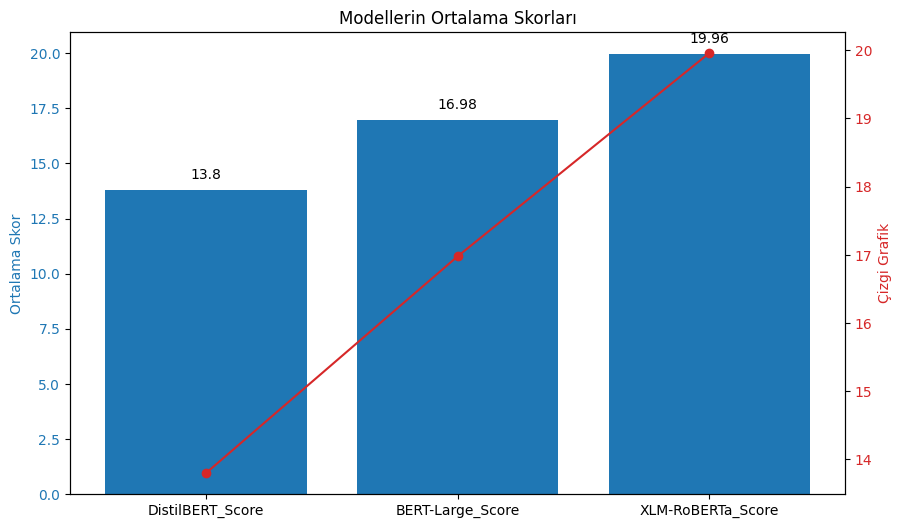

In [15]:
# 1. Ortalama skor grafiği (bar ve line)
average_scores = df[[col for col in df.columns if '_Score' in col]].mean()
fig, ax1 = plt.subplots(figsize=(10, 6))
color = 'tab:blue'
ax1.bar(average_scores.index, average_scores, color=color)
ax1.set_ylabel('Ortalama Skor', color=color)
ax1.set_title('Modellerin Ortalama Skorları')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:red'
ax2.plot(average_scores.index, average_scores, color=color, marker='o')
ax2.set_ylabel('Çizgi Grafik', color=color)
ax2.tick_params(axis='y', labelcolor=color)

for i, v in enumerate(average_scores):
    ax1.text(i, v + 0.5, str(round(v, 2)), ha='center')

plt.show()


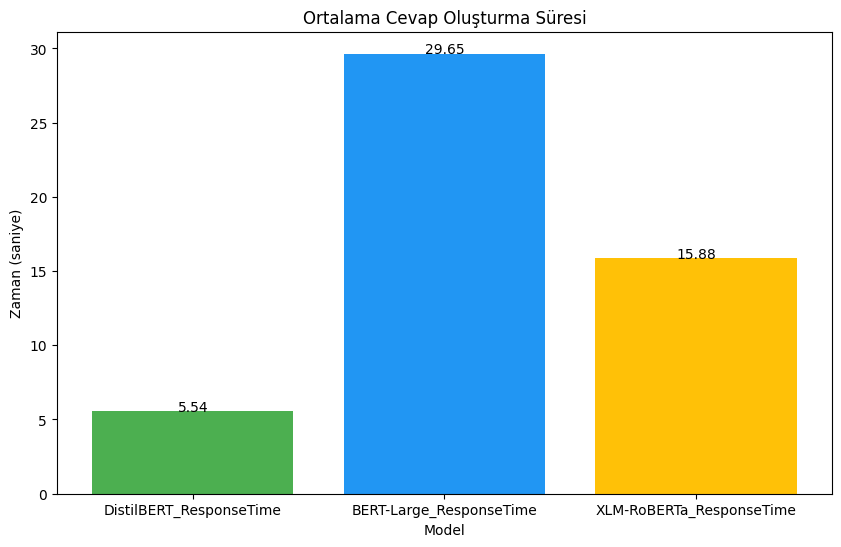

In [16]:
# 2. Ortalama yanıt süresi grafiği (bar)
average_times = df[[col for col in df.columns if '_ResponseTime' in col]].mean()
plt.figure(figsize=(10, 6))
bar = plt.bar(average_times.index, average_times, color=['#4CAF50', '#2196F3', '#FFC107'])
plt.title('Ortalama Cevap Oluşturma Süresi')
plt.ylabel('Zaman (saniye)')
plt.xlabel('Model')

for i, v in enumerate(average_times):
    plt.text(i, v + 0.001, str(round(v, 2)), ha='center')

plt.show()


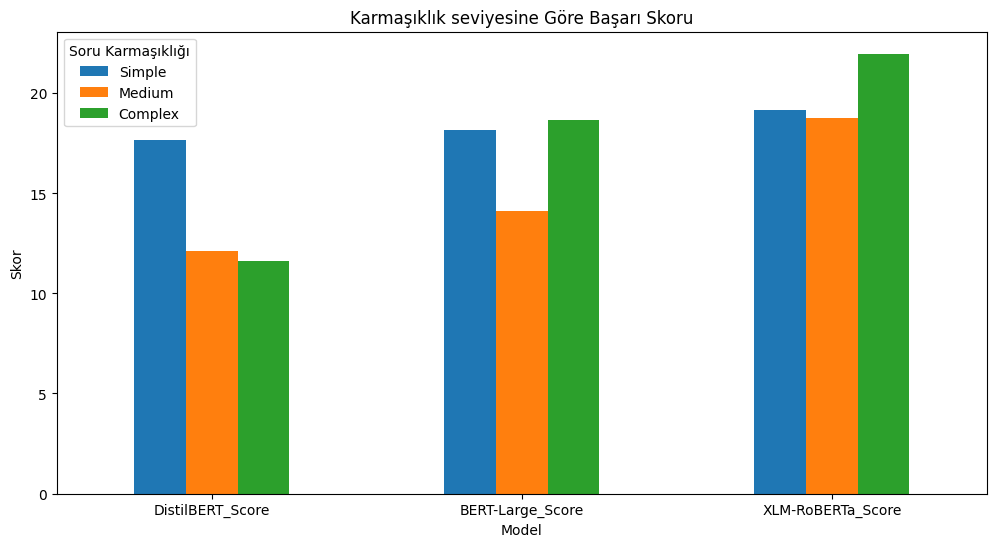

In [17]:
# 3. Zorluk seviyelerine göre başarı grafiği
categories = ['Simple', 'Medium', 'Complex']
category_indices = [
    (0, 10),  # Basit sorular
    (10, 20), # Orta sorular
    (20, 30)  # Zor sorular
]

category_scores = {}
for category, (start, end) in zip(categories, category_indices):
    sub_df = df.iloc[start:end]
    category_scores[category] = sub_df[[col for col in df.columns if '_Score' in col]].mean()

category_scores_df = pd.DataFrame(category_scores)
category_scores_df.plot(kind='bar', figsize=(12, 6), title='Karmaşıklık seviyesine Göre Başarı Skoru')
plt.ylabel('Skor')
plt.xlabel('Model')
plt.xticks(rotation=0)
plt.legend(title='Soru Karmaşıklığı')

plt.show()

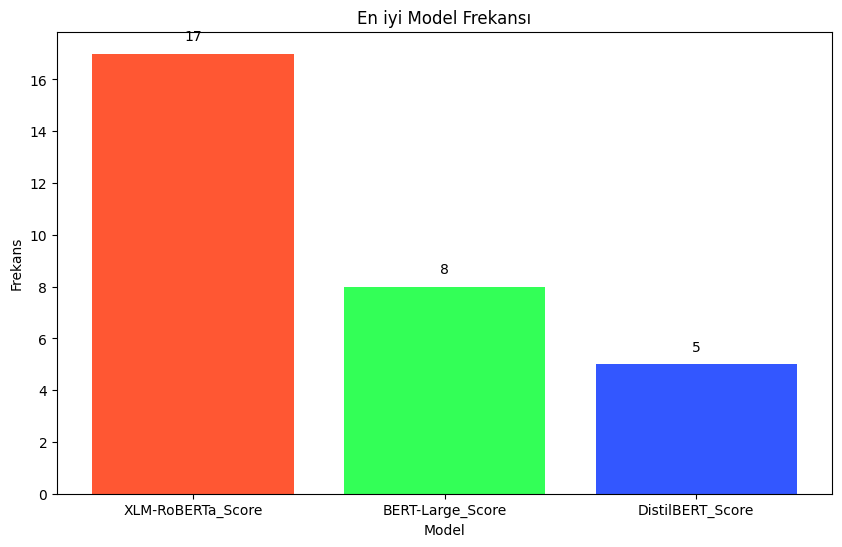

In [18]:
# 4. Her soru için en iyi modeli gösteren grafik (farklı renklerde barlar)
best_models = df[[col for col in df.columns if '_Score' in col]].idxmax(axis=1).value_counts()
plt.figure(figsize=(10, 6))
bar = plt.bar(best_models.index, best_models, color=['#FF5733', '#33FF57', '#3357FF'])
plt.title('En iyi Model Frekansı')
plt.ylabel('Frekans')
plt.xlabel('Model')

for i, v in enumerate(best_models):
    plt.text(i, v + 0.5, str(v), ha='center')

plt.show()


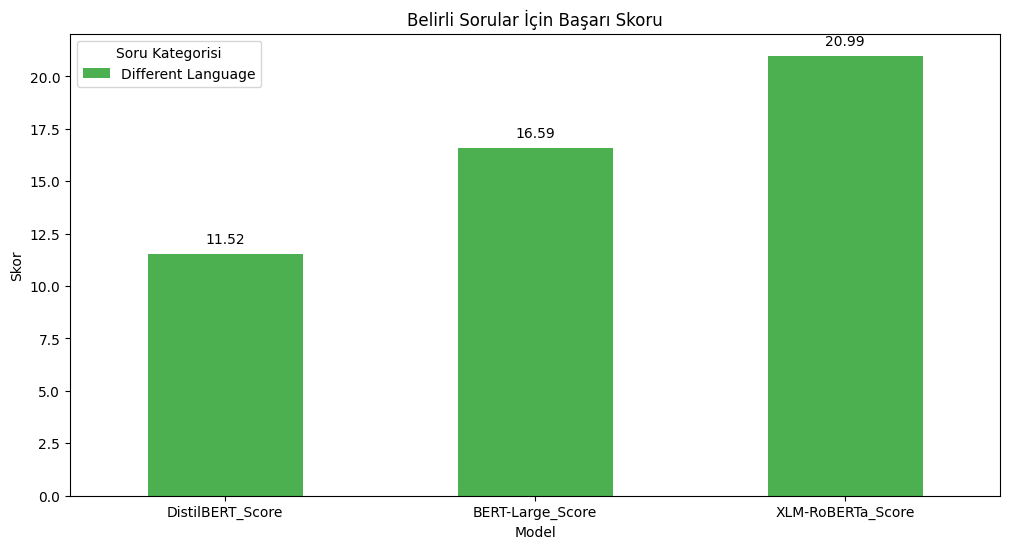

In [19]:
# Zorluk seviyelerine göre başarı grafiği
categories = ['Different Language']
category_indices = [8, 10, 12, 20, 22, 26, 28, 29]

category_scores = {}
sub_df = df.iloc[category_indices]
category_scores['Different Language'] = sub_df[[col for col in df.columns if '_Score' in col]].mean()

category_scores_df = pd.DataFrame(category_scores)
category_scores_df.plot(kind='bar', figsize=(12, 6), color=['#4CAF50', '#2196F3', '#FFC107'], title='Belirli Sorular İçin Başarı Skoru')
plt.ylabel('Skor')
plt.xlabel('Model')
plt.xticks(rotation=0)
plt.legend(title='Soru Kategorisi')

for i, v in enumerate(category_scores_df['Different Language']):
    plt.text(i, v + 0.5, str(round(v, 2)), ha='center')

plt.show()


# Model Tuning

In [ ]:
models2 = {
    "DistilBERT": "distilbert-base-cased-distilled-squad",
    "BERT-Large": "bert-large-uncased-whole-word-masking-finetuned-squad",
    "XLM-RoBERTa": "deepset/xlm-roberta-large-squad2",
}

In [ ]:
from sentence_transformers import SentenceTransformer, util
from rouge_score import rouge_scorer
from torch.utils.data import DataLoader, Dataset
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from transformers import pipeline, AutoTokenizer, AutoModelForQuestionAnswering, Trainer, TrainingArguments

ModuleNotFoundError: No module named 'rouge_score'

In [ ]:
import time
import pandas as pd
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk import download
from transformers import pipeline, AutoTokenizer, AutoModelForQuestionAnswering, Trainer, TrainingArguments
from sentence_transformers import SentenceTransformer, util
from rouge_score import rouge_scorer
from torch.utils.data import DataLoader, Dataset
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from google.colab import files
import os
import torch

In [ ]:
class QADataset(Dataset):
    def __init__(self, data, tokenizer, max_len=512):
        self.data = data
        self.tokenizer = tokenizer
        self.max_len = max_len

    def __len__(self):
        return len(self.data)

    def __getitem__(self, index):
        item = self.data[index]
        encoding = self.tokenizer(
            item['question'],
            item['context'],
            truncation=True,
            padding="max_length",
            max_length=self.max_len,
            return_tensors="pt"
        )
        encoding = {key: val.squeeze(0) for key, val in encoding.items()}  # Sıkıştırma işlemi
        encoding['start_positions'] = torch.tensor([item['answer_start']], dtype=torch.long)
        encoding['end_positions'] = torch.tensor([item['answer_end']], dtype=torch.long)
        return encoding

# Fine-tuning ve sonuçları toplama
results_tuned = []


In [ ]:
!pip install --upgrade torch

In [ ]:
for model_name, model_path in models2.items():
    print(f"\nFine-tuning {model_name}...")

    tokenizer = AutoTokenizer.from_pretrained(model_path)
    model = AutoModelForQuestionAnswering.from_pretrained(model_path)

    # Basit bir örnek veri kümesi ile fine-tuning
    data = []
    for q in simple_questions:
        answer = "Yapay zeka"  # Örnek cevap
        answer_start = context.find(answer)
        if answer_start == -1:
            continue  # Cevap bağlamda bulunmuyorsa bu soruyu atla
        answer_end = answer_start + len(answer)
        data.append({"context": context, "question": q, "answer_start": answer_start, "answer_end": answer_end})

    dataset = QADataset(data, tokenizer)

    training_args = TrainingArguments(
        output_dir=f"./results_{model_name}",
        evaluation_strategy="no",
        learning_rate=2e-5,
        per_device_train_batch_size=2,
        num_train_epochs=1,
        weight_decay=0.01,
        save_steps=10,
        save_total_limit=2,
        report_to="none"  # Wandb'yi devre dışı bırakır
    )

    trainer = Trainer(
        model=model,
        args=training_args,
        train_dataset=dataset,
        tokenizer=tokenizer
    )

    trainer.train()

    # Fine-tuned modeli kaydetme
    model_dir = f"./fine_tuned_{model_name}"
    os.makedirs(model_dir, exist_ok=True)
    trainer.save_model(model_dir)

    # Fine-tuned model ile pipeline oluşturma
    qa_pipeline = pipeline("question-answering", model=model_dir, tokenizer=tokenizer)

    for step, question in enumerate(all_questions, 1):
        print(f"\nStep {step}: Question -> {question}")
        step_result = {"Step": step, "Question": question}

        try:
            start_time = time.time()
            response = qa_pipeline(question=question, context=context)
            elapsed_time = time.time() - start_time
            answer = response["answer"].strip()

            if not answer:
                raise ValueError("Empty answer")

            # Sentence-BERT ile semantik benzerlik skoru hesaplama
            context_embedding = sbert_model.encode(context, convert_to_tensor=True)
            answer_embedding = sbert_model.encode(answer, convert_to_tensor=True)
            semantic_similarity = util.pytorch_cos_sim(context_embedding, answer_embedding).item()

            # ROUGE skoru hesaplama
            rouge = rouge_scorer.RougeScorer(['rouge1', 'rougeL'], use_stemmer=True)
            rouge_scores = rouge.score(context, answer)
            rouge_score = rouge_scores['rougeL'].fmeasure

            # Final skor hesaplama: %50 ROUGE + %50 Semantic Similarity
            final_score = (semantic_similarity * 0.5 + rouge_score * 0.5) * 100
            final_score = round(final_score, 1)

            step_result[f"{model_name}_Answer"] = answer
            step_result[f"{model_name}_ResponseTime"] = elapsed_time
            step_result[f"{model_name}_Score"] = final_score

            print(f"  {model_name} - Answer: {answer} | Time: {elapsed_time:.2f}s | Score: {final_score}")

        except Exception as e:
            print(f"  {model_name} - Error: {str(e)}")
            step_result[f"{model_name}_Answer"] = "Error"
            step_result[f"{model_name}_ResponseTime"] = None
            step_result[f"{model_name}_Score"] = 0.0

        results_tuned.append(step_result)

# Sonuçları DataFrame olarak saklama
df2 = pd.DataFrame(results_tuned)
print("\nFinal Tuned Results:\n")
print(df2)

NameError: name 'models2' is not defined